# **MULTICLASS CNN**

## Importing the dataset

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-01 09:55:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.251.107.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   155MB/s    in 3.2s    

2022-11-01 09:55:52 (155 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:

import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# View 3 random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_three_images(target_dir, target_class):
    """
    Randomly selects and displays 3 random images from `target_class` folder in `target_dir` folder.
    
    Requires target_dir to be in format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
                 
    """
    target_path = target_dir+target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)
    
    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

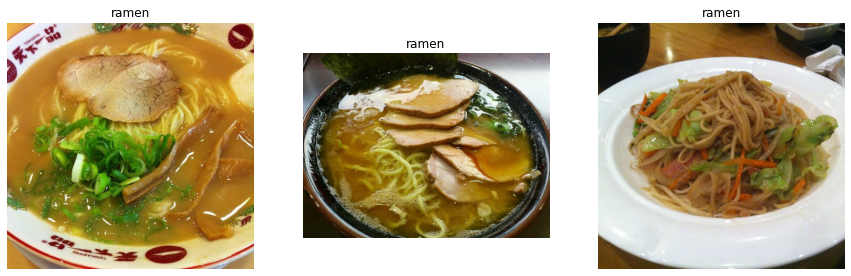

In [5]:
['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
view_three_images(target_dir=train_dir, 
                  target_class="ramen")

## define the model

In [6]:
#Define some parameters for the loader:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
import tensorflow as tf

In [32]:
# Import data from directories and turn it into batches
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                               validation_split=0.2,
                                               subset="training",
                                               seed=123,
                                               batch_size=batch_size, # number of images to process at a time 
                                               image_size=(img_height, img_width)) # convert all images to be 224 x 224


Found 7500 files belonging to 10 classes.
Using 6000 files for training.


In [10]:

validation_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                               validation_split=0.2,
                                               subset="validation",
                                               seed=123,
                                               batch_size=batch_size,
                                               image_size=(img_height, img_width))


Found 7500 files belonging to 10 classes.
Using 1500 files for validation.


In [11]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                               batch_size=32,
                                               image_size=(img_height, img_width),
                                               seed=42)

Found 2500 files belonging to 10 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

model_1 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10)
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:

# Fit the model
epochs=10
history_1 = model_1.fit(train_data, # now 10 different classes 
                        epochs=epochs,
                        batch_size=32,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data)

Epoch 1/10
188/188 [==============================] - 326s 2s/step - loss: 2.1253 - accuracy: 0.2302 - val_loss: 1.9707 - val_accuracy: 0.2860
Epoch 2/10
188/188 [==============================] - 322s 2s/step - loss: 1.8312 - accuracy: 0.3645 - val_loss: 1.9087 - val_accuracy: 0.3380
Epoch 3/10
188/188 [==============================] - 318s 2s/step - loss: 1.5722 - accuracy: 0.4645 - val_loss: 1.9037 - val_accuracy: 0.3653
Epoch 4/10
188/188 [==============================] - 317s 2s/step - loss: 1.1067 - accuracy: 0.6368 - val_loss: 2.2154 - val_accuracy: 0.3513
Epoch 5/10
188/188 [==============================] - 327s 2s/step - loss: 0.5779 - accuracy: 0.8170 - val_loss: 3.0290 - val_accuracy: 0.3447
Epoch 6/10
188/188 [==============================] - 321s 2s/step - loss: 0.2404 - accuracy: 0.9270 - val_loss: 3.8270 - val_accuracy: 0.3253
Epoch 7/10
188/188 [==============================] - 320s 2s/step - loss: 0.1198 - accuracy: 0.9653 - val_loss: 3.9664 - val_accuracy: 0.3380

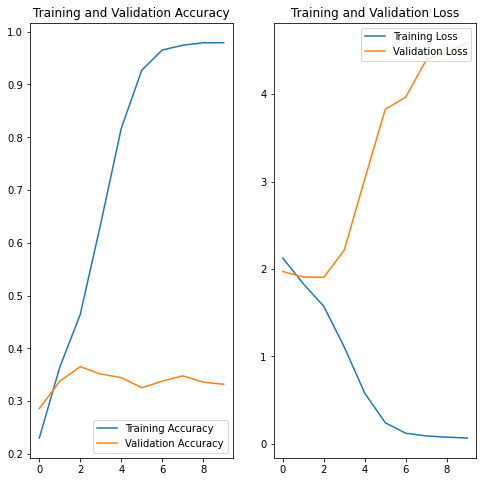

In [15]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#usint the entire dataset to train the model
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_2 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_2.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
# Fit the model
epochs=10
history_2 = model_2.fit(train_data, # now 10 different classes 
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        batch_size=32,
                        validation_data=test_data)

Epoch 1/10
235/235 [==============================] - 610s 3s/step - loss: 2.3032 - accuracy: 0.0900 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
235/235 [==============================] - 609s 3s/step - loss: 2.3028 - accuracy: 0.0937 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
235/235 [==============================] - 616s 3s/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
235/235 [==============================] - 610s 3s/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
235/235 [==============================] - 610s 3s/step - loss: 2.3029 - accuracy: 0.0929 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
235/235 [==============================] - 610s 3s/step - loss: 2.3028 - accuracy: 0.0951 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
235/235 [==============================] - 615s 3s/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000

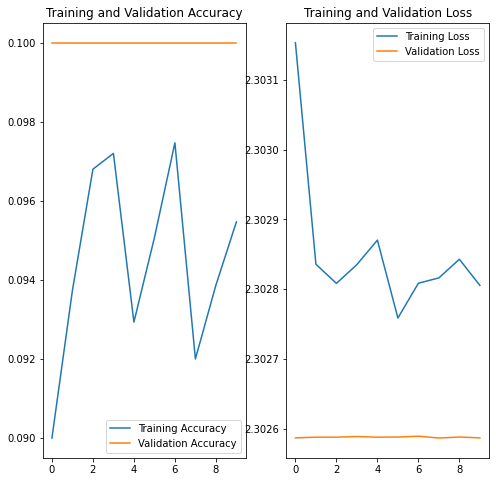

In [39]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [53]:
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 346s 1s/step - loss: 2.2550 - accuracy: 0.1775 - val_loss: 2.0472 - val_accuracy: 0.2648
Epoch 2/5
235/235 [==============================] - 341s 1s/step - loss: 2.0899 - accuracy: 0.2493 - val_loss: 2.0153 - val_accuracy: 0.2820
Epoch 3/5
235/235 [==============================] - 343s 1s/step - loss: 2.0511 - accuracy: 0.2724 - val_loss: 1.9121 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 340s 1s/step - loss: 2.0122 - accuracy: 0.2835 - val_loss: 1.9142 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 341s 1s/step - loss: 1.9981 - accuracy: 0.2975 - val_loss: 1.8816 - val_accuracy: 0.3520
